<a href="https://colab.research.google.com/github/afnanrahman/EAFP/blob/main/smote_balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Text(0, 0.5, 'attrition')

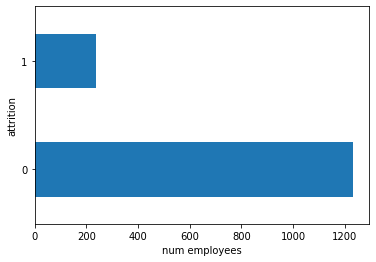

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_data.csv")

data['attrition'].value_counts().plot(kind='barh')
plt.xlabel('num employees')
plt.ylabel('attrition')

In [3]:
(data['attrition'].value_counts() / len(data))*100

0    83.877551
1    16.122449
Name: attrition, dtype: float64

From the code above, we can see that only 16% of all employees in this dataset have quit their job. This shows us that this dataset is imbalanced, and that we need to fix it for our future modeling.

In [4]:
data_cols = data.drop('attrition', axis = 1) #x
target_var = data['attrition'] #y

In [ ]:
sm =  SMOTE()
data_cols_sm, target_var_sm = sm.fit_resample(data_cols, target_var)

In [6]:
df = pd.DataFrame({'attrition': target_var_sm})
df.value_counts()

attrition
1            1233
0            1233
dtype: int64

We can now see that the dataset is completely balanced, with respect to our target variable, employee attrition. 

In [7]:
len(data_cols_sm)

2466

In [8]:
len(target_var_sm)

2466

In [9]:
target_var_sm = target_var_sm.reshape(-1, 1)
merged_smote = np.concatenate((data_cols_sm, target_var_sm), axis = 1)
np.savetxt('smote_data.csv', merged_smote, delimiter=',')

In [10]:
pd.read_csv("/content/drive/MyDrive/EAFP_files/smote_data.csv")

,0.000000000000000000e+00,4.100000000000000000e+01,2.000000000000000000e+00,1.102000000000000000e+03,2.000000000000000000e+00.1,1.000000000000000000e+00,2.000000000000000000e+00.2,1.000000000000000000e+00.1,1.000000000000000000e+00.2,2.000000000000000000e+00.3,0.000000000000000000e+00.1,9.400000000000000000e+01,3.000000000000000000e+00,2.000000000000000000e+00.4,7.000000000000000000e+00,4.000000000000000000e+00,2.000000000000000000e+00.5,1.947900000000000000e+04,8.000000000000000000e+00,1.000000000000000000e+00.3,1.100000000000000000e+01,3.000000000000000000e+00.1,1.000000000000000000e+00.4,0.000000000000000000e+00.2,8.000000000000000000e+00.1,0.000000000000000000e+00.3,1.000000000000000000e+00.5,6.000000000000000000e+00,4.000000000000000000e+00.1,5.000000000000000000e+00,6.891666666666667879e+03,1.000000000000000000e+00.6
0,1.000000,49.000000,1.000000,279.000000,1.000000,8.000000,1.000000,1.000000,2.000000,3.000000,1.000000,61.000000,2.000000,2.000000,6.000000,2.000000,1.000000,24907.000000,1.000000,0.000000,23.000000,4.000000,4.000000,1.000000,10.000000,3.000000,3.000000,10.000000,7.000000,7.000000,8415.666667,0.0
1,2.000000,37.000000,2.000000,1373.000000,1.000000,2.000000,2.000000,4.000000,4.000000,4.000000,1.000000,92.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2396.000000,6.000000,1.000000,15.000000,3.000000,2.000000,0.000000,7.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1287.000000,1.0
2,3.000000,33.000000,1.000000,1392.000000,1.000000,3.000000,4.000000,1.000000,5.000000,4.000000,0.000000,56.000000,3.000000,1.000000,6.000000,3.000000,1.000000,23159.000000,1.000000,1.000000,11.000000,3.000000,3.000000,0.000000,8.000000,3.000000,3.000000,8.000000,7.000000,0.000000,8202.333333,0.0
3,4.000000,27.000000,2.000000,591.000000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,1.000000,40.000000,3.000000,1.000000,2.000000,2.000000,1.000000,16632.000000,9.000000,0.000000,12.000000,3.000000,4.000000,1.000000,6.000000,3.000000,3.000000,2.000000,2.000000,2.000000,5754.333333,0.0
4,5.000000,32.000000,1.000000,1005.000000,1.000000,2.000000,2.000000,1.000000,8.000000,4.000000,1.000000,79.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11864.000000,0.000000,0.000000,13.000000,3.000000,3.000000,0.000000,8.000000,2.000000,2.000000,7.000000,7.000000,6.000000,4316.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,1206.818985,33.120413,2.000000,281.196796,1.874694,24.117967,3.000000,1.501223,1692.119071,2.749388,1.000000,84.000000,3.000000,1.874694,6.373471,3.624083,2.000000,13431.352008,1.000000,0.874694,18.125306,3.000000,3.749388,0.000000,8.872248,2.000000,3.000000,8.872248,6.122860,6.122860,4598.849601,1.0
2461,1040.748336,34.313391,0.312441,526.075039,1.000000,4.187084,3.000000,1.624881,1469.247861,1.312441,0.312441,64.935420,2.312441,1.000000,2.000000,1.000000,2.000000,17123.823375,2.000000,1.000000,19.250713,3.687559,2.312441,0.000000,8.812916,2.000000,3.375119,0.687559,0.000000,0.000000,5904.944611,1.0
2462,390.753668,26.126865,1.042288,584.726298,1.000000,2.915423,1.042288,4.830847,522.940205,2.957712,0.957712,71.435335,2.957712,1.000000,5.830847,1.000000,1.957712,6586.524843,0.042288,0.042288,21.534829,3.957712,3.042288,0.042288,6.746270,1.957712,3.000000,5.788559,3.830847,3.830847,2414.228825,1.0
2463,1271.359504,41.319124,1.134044,403.665723,0.865956,3.814920,1.865956,2.597869,1781.544584,3.134044,1.000000,93.504204,2.731912,1.000000,5.329781,2.134044,0.134044,11158.083591,1.000000,0.865956,11.865956,3.000000,3.000000,2.731912,5.329781,2.000000,2.134044,4.463825,2.597869,2.597869,3885.084506,1.0


As seen above, we need to fix the header names.

In [11]:
col_names = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_data.csv", index_col=0, nrows=0).columns.tolist()
col_names

['age',
 'attrition',
 'business_travel',
 'daily_rate',
 'department',
 'distance_from_home',
 'education',
 'education_field',
 'employee_number',
 'environment_satisfaction',
 'gender',
 'hourly_rate',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'monthly_rate',
 'num_companies_worked',
 'over_time',
 'percent_salary_hike',
 'performance_rating',
 'relationship_satisfaction',
 'stock_option_level',
 'total_working_years',
 'training_times_last_year',
 'work_life_balance',
 'years_at_company',
 'years_in_current_role',
 'years_with_curr_manager',
 'rate_avg']

In [12]:
col_names.remove('attrition')
col_names.append('attrition') 

In [13]:
col_names

['age',
 'business_travel',
 'daily_rate',
 'department',
 'distance_from_home',
 'education',
 'education_field',
 'employee_number',
 'environment_satisfaction',
 'gender',
 'hourly_rate',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'monthly_rate',
 'num_companies_worked',
 'over_time',
 'percent_salary_hike',
 'performance_rating',
 'relationship_satisfaction',
 'stock_option_level',
 'total_working_years',
 'training_times_last_year',
 'work_life_balance',
 'years_at_company',
 'years_in_current_role',
 'years_with_curr_manager',
 'rate_avg',
 'attrition']

In [14]:
smote_data = pd.read_csv("/content/drive/MyDrive/EAFP_files/smote_data.csv", names = col_names)
smote_data

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,rate_avg,attrition
0.000000,41.000000,2.000000,1102.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,94.000000,3.000000,2.000000,7.000000,4.000000,2.000000,19479.000000,8.000000,1.000000,11.000000,3.000000,1.000000,0.000000,8.000000,0.000000,1.000000,6.000000,4.000000,5.000000,6891.666667,1.0
1.000000,49.000000,1.000000,279.000000,1.000000,8.000000,1.000000,1.000000,2.000000,3.000000,1.000000,61.000000,2.000000,2.000000,6.000000,2.000000,1.000000,24907.000000,1.000000,0.000000,23.000000,4.000000,4.000000,1.000000,10.000000,3.000000,3.000000,10.000000,7.000000,7.000000,8415.666667,0.0
2.000000,37.000000,2.000000,1373.000000,1.000000,2.000000,2.000000,4.000000,4.000000,4.000000,1.000000,92.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2396.000000,6.000000,1.000000,15.000000,3.000000,2.000000,0.000000,7.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1287.000000,1.0
3.000000,33.000000,1.000000,1392.000000,1.000000,3.000000,4.000000,1.000000,5.000000,4.000000,0.000000,56.000000,3.000000,1.000000,6.000000,3.000000,1.000000,23159.000000,1.000000,1.000000,11.000000,3.000000,3.000000,0.000000,8.000000,3.000000,3.000000,8.000000,7.000000,0.000000,8202.333333,0.0
4.000000,27.000000,2.000000,591.000000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,1.000000,40.000000,3.000000,1.000000,2.000000,2.000000,1.000000,16632.000000,9.000000,0.000000,12.000000,3.000000,4.000000,1.000000,6.000000,3.000000,3.000000,2.000000,2.000000,2.000000,5754.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206.818985,33.120413,2.000000,281.196796,1.874694,24.117967,3.000000,1.501223,1692.119071,2.749388,1.000000,84.000000,3.000000,1.874694,6.373471,3.624083,2.000000,13431.352008,1.000000,0.874694,18.125306,3.000000,3.749388,0.000000,8.872248,2.000000,3.000000,8.872248,6.122860,6.122860,4598.849601,1.0
1040.748336,34.313391,0.312441,526.075039,1.000000,4.187084,3.000000,1.624881,1469.247861,1.312441,0.312441,64.935420,2.312441,1.000000,2.000000,1.000000,2.000000,17123.823375,2.000000,1.000000,19.250713,3.687559,2.312441,0.000000,8.812916,2.000000,3.375119,0.687559,0.000000,0.000000,5904.944611,1.0
390.753668,26.126865,1.042288,584.726298,1.000000,2.915423,1.042288,4.830847,522.940205,2.957712,0.957712,71.435335,2.957712,1.000000,5.830847,1.000000,1.957712,6586.524843,0.042288,0.042288,21.534829,3.957712,3.042288,0.042288,6.746270,1.957712,3.000000,5.788559,3.830847,3.830847,2414.228825,1.0
1271.359504,41.319124,1.134044,403.665723,0.865956,3.814920,1.865956,2.597869,1781.544584,3.134044,1.000000,93.504204,2.731912,1.000000,5.329781,2.134044,0.134044,11158.083591,1.000000,0.865956,11.865956,3.000000,3.000000,2.731912,5.329781,2.000000,2.134044,4.463825,2.597869,2.597869,3885.084506,1.0


In [15]:
smote_data = smote_data.round(2)
smote_data.reset_index(drop=True)

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,rate_avg,attrition
0,41.00,2.00,1102.00,2.00,1.00,2.00,1.00,1.00,2.00,0.00,94.00,3.00,2.00,7.00,4.00,2.00,19479.00,8.00,1.00,11.00,3.00,1.00,0.00,8.00,0.00,1.00,6.00,4.00,5.00,6891.67,1.0
1,49.00,1.00,279.00,1.00,8.00,1.00,1.00,2.00,3.00,1.00,61.00,2.00,2.00,6.00,2.00,1.00,24907.00,1.00,0.00,23.00,4.00,4.00,1.00,10.00,3.00,3.00,10.00,7.00,7.00,8415.67,0.0
2,37.00,2.00,1373.00,1.00,2.00,2.00,4.00,4.00,4.00,1.00,92.00,2.00,1.00,2.00,3.00,2.00,2396.00,6.00,1.00,15.00,3.00,2.00,0.00,7.00,3.00,3.00,0.00,0.00,0.00,1287.00,1.0
3,33.00,1.00,1392.00,1.00,3.00,4.00,1.00,5.00,4.00,0.00,56.00,3.00,1.00,6.00,3.00,1.00,23159.00,1.00,1.00,11.00,3.00,3.00,0.00,8.00,3.00,3.00,8.00,7.00,0.00,8202.33,0.0
4,27.00,2.00,591.00,1.00,2.00,1.00,3.00,7.00,1.00,1.00,40.00,3.00,1.00,2.00,2.00,1.00,16632.00,9.00,0.00,12.00,3.00,4.00,1.00,6.00,3.00,3.00,2.00,2.00,2.00,5754.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,33.12,2.00,281.20,1.87,24.12,3.00,1.50,1692.12,2.75,1.00,84.00,3.00,1.87,6.37,3.62,2.00,13431.35,1.00,0.87,18.13,3.00,3.75,0.00,8.87,2.00,3.00,8.87,6.12,6.12,4598.85,1.0
2462,34.31,0.31,526.08,1.00,4.19,3.00,1.62,1469.25,1.31,0.31,64.94,2.31,1.00,2.00,1.00,2.00,17123.82,2.00,1.00,19.25,3.69,2.31,0.00,8.81,2.00,3.38,0.69,0.00,0.00,5904.94,1.0
2463,26.13,1.04,584.73,1.00,2.92,1.04,4.83,522.94,2.96,0.96,71.44,2.96,1.00,5.83,1.00,1.96,6586.52,0.04,0.04,21.53,3.96,3.04,0.04,6.75,1.96,3.00,5.79,3.83,3.83,2414.23,1.0
2464,41.32,1.13,403.67,0.87,3.81,1.87,2.60,1781.54,3.13,1.00,93.50,2.73,1.00,5.33,2.13,0.13,11158.08,1.00,0.87,11.87,3.00,3.00,2.73,5.33,2.00,2.13,4.46,2.60,2.60,3885.08,1.0


In [17]:
smote_data.to_csv('clean_smote_data.csv')